In [108]:
#relevant modules we need to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [109]:
raw_mvp_data = pd.read_csv('/Users/rabee/Downloads/mvp_data.csv')
raw_mvp_data.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,...,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3
1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,...,13.3,30.3,7.3,5.2,12.5,0.213,5.7,1.9,7.6,6.8
2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,...,10.3,31.7,9.3,1.3,10.6,0.173,5.5,-1.6,3.9,4.4
3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,...,14.0,25.3,5.6,5.6,11.2,0.182,3.0,1.5,4.5,4.8
4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,...,19.7,17.0,5.9,2.9,8.9,0.148,1.4,-0.3,1.1,2.3


In [110]:
raw_mvp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           679 non-null    object 
 1   Player                         679 non-null    object 
 2   Age                            679 non-null    int64  
 3   Tm                             679 non-null    object 
 4   First                          679 non-null    float64
 5   Pts Won                        679 non-null    float64
 6   Pts Max                        679 non-null    int64  
 7   Share                          679 non-null    float64
 8   G                              679 non-null    int64  
 9   MP                             679 non-null    float64
 10  PTS                            679 non-null    float64
 11  TRB                            679 non-null    float64
 12  AST                            679 non-null    flo

As you can see there are no null values in the dataset, so we don't have to account for missing values

In [111]:
#we can safely drop the rank, tm,team and name variables as rank is redaudant since we are given MVP win shares
#already, and it is not practical for us to use name or tm since encoding each distinct name and team value will 
#create a huge matrix
mvp_data = raw_mvp_data.drop(labels=['Rank','Player','Tm','team'], axis=1)

<AxesSubplot:>

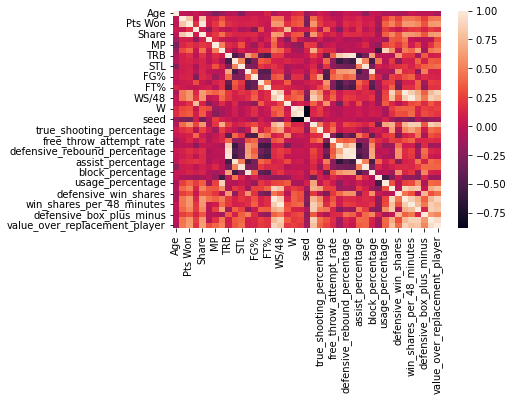

In [112]:
sb.heatmap(mvp_data.corr())
#target_features = ['Pts Won','Share','MP','STL','FG%','FT%','W','seed','true_shooting_percentage',
#                    'three_point_attempt_rate'] #features we expect to have correlaton with MVP win_share
#sb.heatmap(raw_mvp_data[target_features].corr(), annot=True) #create heatmap to visualize correlations

<p>As you can see this correlaton matrix is simply unreadable due to the sheer amount of variables we have, so to counteract this issue, we have 2 approaches we could go with:</p>
<ol>
    <li> We could use our best judgement and determine what features we personally think have a correlation with MVP win share </li>
    <li> We could filter out values that have a correlation of less than a certain threshold, to maginify relevant values that actually hold a correlation with MVP win shares </li>
</ol>
<p>Now the second approach seems less suspectible to bias, offering statistical backing. Now in this case we will set the threshold to be 0.2, and only look at categories with a correlation >=0.2 with MVP Win Share

In [113]:
#The following prints out the list of correlations each variable has with MVP win share
corr_mvp = (mvp_data.corr()).Share
print(corr_mvp)

Age                             -0.001800
First                            0.812318
Pts Won                          0.977362
Pts Max                          0.078242
Share                            1.000000
G                                0.110165
MP                               0.213530
PTS                              0.432432
TRB                              0.188887
AST                              0.130440
STL                              0.126365
BLK                              0.133683
FG%                              0.154296
3P%                              0.040934
FT%                              0.059078
WS                               0.619349
WS/48                            0.600351
year                             0.111664
W                                0.317717
W/L%                             0.350305
seed                            -0.323283
player_efficiency_rating         0.599861
true_shooting_percentage         0.256370
three_point_attempt_rate         0

In [114]:
#we will create two arrays, one with variables that have correlation >= 0.2, the other with correlation <0.2
#remember we are interested in only the magnitutde, so we will use absolute value
uncorrelated_features = [col for col in mvp_data.columns if abs(corr_mvp[col]) < 0.2]
correlated_features = [col for col in mvp_data.columns if abs(corr_mvp[col]) >= 0.2]

print('The uncorrelated features are:')
for feature in uncorrelated_features:
    print(feature)
print('\n')
print('The correlated features are:')
for feature in correlated_features:
    print(feature)

The uncorrelated features are:
Age
Pts Max
G
TRB
AST
STL
BLK
FG%
3P%
FT%
year
three_point_attempt_rate
free_throw_attempt_rate
offensive_rebound_percentage
defensive_rebound_percentage
total_rebound_percentage
assist_percentage
steal_percentage
block_percentage
turnover_percentage


The correlated features are:
First
Pts Won
Share
MP
PTS
WS
WS/48
W
W/L%
seed
player_efficiency_rating
true_shooting_percentage
usage_percentage
offensive_win_shares
defensive_win_shares
win_shares
win_shares_per_48_minutes
offensive_box_plus_minus
defensive_box_plus_minus
box_plus_minus
value_over_replacement_player


<p>From this we can see that there are a lot of correlated features that essentially tell us the same thing. So to further narrow down our correlated_features list, we will remove these redaundcies</p>
<ul>
    <li> First, Pts Won, and Share all essentially tell the same thing, as they are related to MVP voting. We only need to keep one of these metrics, so we will choose Share (repersents MVP shares).
    <li>WS and WS/48 essentially tell us the same thing, so we will drop WS/48</li>
    <li>W, W/L%, and seed convey very similar information related to the strength of a player's team. We will drop W, keeping seed and W/L for now. Further analysis may be required to determine if seed and W/L are related to each other% </li>
    <li>win_shares and win_shares_per_48_minutes convey same information, drop win_shares_per_48_minutes </li>
    <li>offensive_box_plus_minus, defensive_box_plus_minus, box_plus_minus are all very similar metrics, we only need two to calculate the thrid one, so we will keep OBPM, and BPM, dropping DBPM</li>

In [115]:
features_to_drop = ['First','Pts Won','WS/48','W','seed','win_shares_per_48_minutes','defensive_box_plus_minus']
for feature in features_to_drop:
    correlated_features.remove(feature)
    
mvp_data = mvp_data.drop(features_to_drop, axis=1)

<AxesSubplot:>

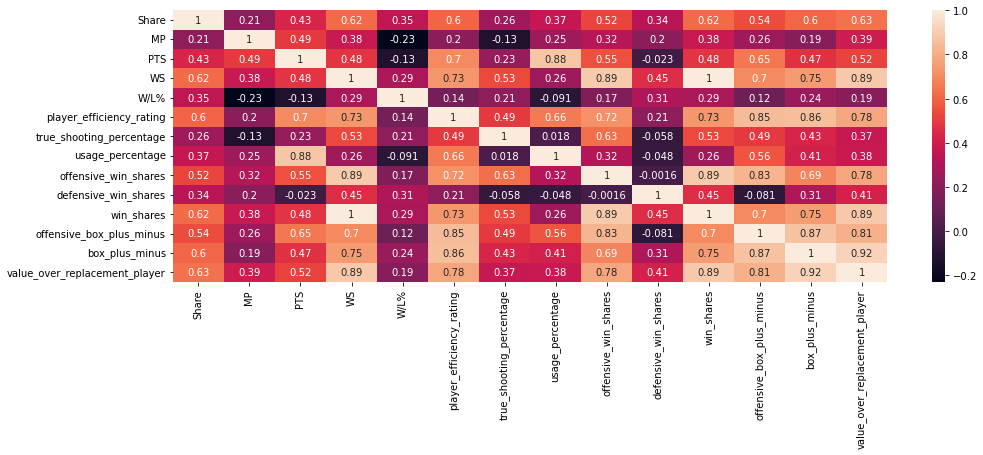

In [116]:
#Now we will print our new correlated heatmap
plt.figure(figsize=(16,5))
sb.heatmap(mvp_data[correlated_features].corr(), annot=True)

<h5>Problem: High multicolinearity between our variables </h5>
<p>From this heatmap, we can see that there is high amounts of multicolinearity between our variables. This tells us that multplie of our variables still tell us the same thing. e.g.) win_shares has high correlation with box_plus_minus as both perform a player's overall performance over a given season which means these variables are redaudant and tell us the same thing.</p>

<h5>Proposed Solution: Detecting multicolinearity with VIF </h5>
<p>VIF(Variance Inflation Feature) tells us how multicolinear a particular feature is. We will calculate the VIF of all features in our correlated_features list, dropping the ones with the highest VIF, recalculating then dropping again until we get relatively low VIF's for all our features.

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent_vars = correlated_features
independent_vars.remove('Share') #we are only interested in mutlicolinearity of independent variables, so we
                               #drop Share which is the dependent variable

In [118]:
def output_vif_data(independent_vars, mvp_data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = mvp_data[independent_vars].columns
    vif_data['VIF'] = [variance_inflation_factor((mvp_data[independent_vars]).values, i)
                             for i in range(len((mvp_data[independent_vars]).columns))]
    vif_data.plot.barh(x='Feature',y='VIF')

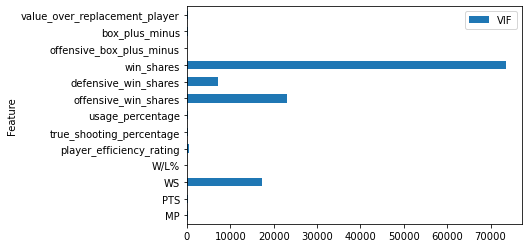

In [119]:
output_vif_data(independent_vars, mvp_data)

<p>As you can see, win_shares has an astonishingly high win_shares, so we will drop it and then calculate our VIF again</p>

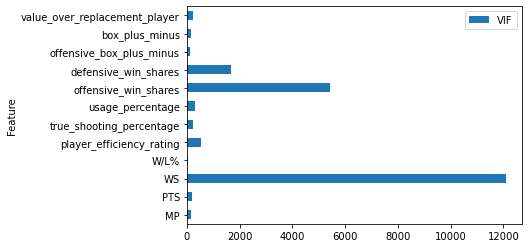

In [120]:
independent_vars.remove('win_shares')
output_vif_data(independent_vars, mvp_data)

<p>From this iteration, we see that WS stands out, so we will drop it and recalculate our VIF again

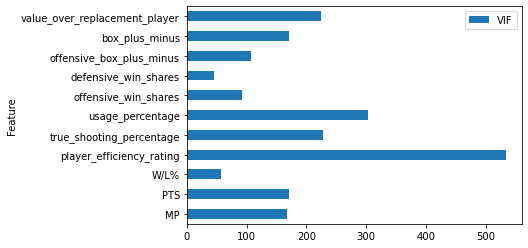

In [121]:
independent_vars.remove('WS')
output_vif_data(independent_vars, mvp_data)

<p>From this iteration, we see that PER stands out, so we will drop it and recalculate our VIF again

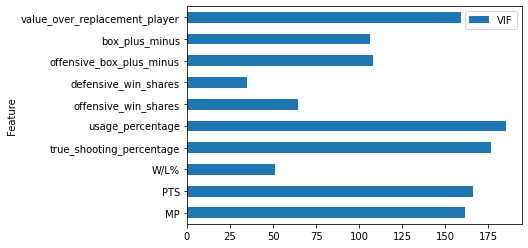

In [122]:
independent_vars.remove('player_efficiency_rating')
output_vif_data(independent_vars, mvp_data)

<p>From this graph, we see that even though their are still values with high VIF's no one value stands out as an outlier. So we will stop dropping features.</p>

In [123]:
print(independent_vars) #finalized list of independent variables

['MP', 'PTS', 'W/L%', 'true_shooting_percentage', 'usage_percentage', 'offensive_win_shares', 'defensive_win_shares', 'offensive_box_plus_minus', 'box_plus_minus', 'value_over_replacement_player']


<h5> Dependent Variable: MVP Share </h5>

In [124]:
X = mvp_data[independent_vars]
y = mvp_data.Share #our dependent variable

The data set is clean and we are ready to go into modelling

<h2> Regression Modelling </h2>

Our Training Data will be from 1980 to 2010.</br> Our Test Data will be from 2011 to 2021.

In [125]:
#Since our data has a date column for year, we will split it as follows:

train_X = X[raw_mvp_data['year'] <= 2010]
val_X = X[raw_mvp_data['year'] > 2010]
train_y = y[raw_mvp_data['year'] <= 2010]
val_y = y[raw_mvp_data['year'] > 2010]

<h5> Model: RandomForestRegressor </h5>

In [126]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
predictions = forest_model.predict(val_X)
mae = mean_absolute_error(predictions, val_y)
r2 = r2_score(val_y, predictions)
print('Average MAE: '+ str(mae))
print('R2 value: ' + str(r2))
print(predictions)

Average MAE: 0.13330368055555553
R2 value: 0.612666222123234
[0.52252 0.20567 0.48697 0.21475 0.18748 0.10371 0.42766 0.08097 0.00832
 0.00693 0.00604 0.00891 0.07741 0.5282  0.36245 0.18987 0.04138 0.02511
 0.05555 0.08251 0.00915 0.0254  0.17847 0.299   0.03448 0.07067 0.01071
 0.00348 0.82306 0.61112 0.10588 0.27399 0.06307 0.01609 0.08719 0.10942
 0.28818 0.09163 0.06263 0.00971 0.08073 0.00516 0.00688 0.00462 0.59424
 0.39703 0.14039 0.08868 0.17311 0.15012 0.1655  0.02004 0.13953 0.01088
 0.22866 0.02259 0.01691 0.07641 0.04556 0.02003 0.00794 0.80528 0.53306
 0.1356  0.21217 0.18223 0.33969 0.0245  0.0582  0.03749 0.06012 0.03346
 0.14655 0.80238 0.31049 0.4655  0.23597 0.37849 0.0466  0.13755 0.05425
 0.21195 0.07823 0.41164 0.4278  0.64382 0.1909  0.29822 0.41907 0.10692
 0.06569 0.151   0.42818 0.04107 0.81242 0.34373 0.17567 0.15645 0.08934
 0.15478 0.34617 0.03459 0.06699 0.0529  0.29037 0.03744 0.10991 0.49281
 0.53447 0.13131 0.15569 0.29598 0.14376 0.17813 0.23597 0.2249

<p>Our model has now sucesfully predicted the MVP shares of each MVP candidate for the 2010 to 2021 season. We will now translate this to giving us the predicted MVP winners and compare it with the actual MVP winners.</p>

In [127]:
mvp_preds = raw_mvp_data[raw_mvp_data['year'] >= 2011]
mvp_preds['predictions'] = predictions
mvp_preds.head()

/var/folders/vd/4pzpvrnn4t34rz_w4mzx_hq40000gp/T/ipykernel_5858/143478682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp_preds['predictions'] = predictions


,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,predictions
535,1,Derrick Rose,22,CHI,113.0,1182.0,1210,0.977,81,37.4,...,32.2,8.3,4.8,13.1,0.208,6.3,0.5,6.8,6.7,0.52252
536,2,Dwight Howard,25,ORL,3.0,643.0,1210,0.531,78,37.6,...,27.2,6.7,7.7,14.4,0.235,2.9,2.4,5.3,5.4,0.20567
537,3,LeBron James,26,MIA,4.0,522.0,1210,0.431,79,38.8,...,31.5,10.3,5.3,15.6,0.244,6.3,1.8,8.1,7.8,0.48697
538,4,Kobe Bryant,32,LAL,1.0,428.0,1210,0.354,82,33.9,...,35.1,6.8,3.5,10.3,0.178,5.4,-0.2,5.2,5.0,0.21475
539,5,Kevin Durant,22,OKC,0.0,190.0,1210,0.157,78,38.9,...,30.6,8.6,3.3,12.0,0.189,5.2,-0.3,4.9,5.3,0.18748


In [128]:
years = [year for year in range(2011, 2022)]


for year in years:
    df = mvp_preds[mvp_preds['year'] == year]
    actual_mvp = (df[df['Share'] == df['Share'].max()]['Player']).to_string(index=False,header=False)
    predict_mvp = (df[df['predictions'] == df['predictions'].max()]['Player']).to_string(index=False,header=False)
    print(str(year) + ': Actual MVP was ' + str(actual_mvp) + '. You guessed ' + str(predict_mvp) +'.')

2011: Actual MVP was Derrick Rose. You guessed Derrick Rose.
2012: Actual MVP was LeBron James. You guessed LeBron James.
2013: Actual MVP was LeBron James. You guessed LeBron James.
2014: Actual MVP was Kevin Durant. You guessed Kevin Durant.
2015: Actual MVP was Stephen Curry. You guessed Stephen Curry.
2016: Actual MVP was Stephen Curry. You guessed Stephen Curry.
2017: Actual MVP was Russell Westbrook. You guessed Kawhi Leonard.
2018: Actual MVP was James Harden. You guessed James Harden.
2019: Actual MVP was Giannis Antetokounmpo. You guessed James Harden.
2020: Actual MVP was Giannis Antetokounmpo. You guessed Giannis Antetokounmpo.
2021: Actual MVP was Nikola Jokić. You guessed Nikola Jokić.
